In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 271590_GTA _V.csv to 271590_GTA _V.csv


In [ ]:
df = pd.read_csv('/content/271590_GTA _V.csv') #271590_GTA _V , 578080_PUBG
df

,Time,Sum of Playercount
0,12/14/2017,21014611
1,12/15/2017,23589494
2,12/16/2017,28700442
3,12/17/2017,28414362
4,12/18/2017,20558508
...,...,...
968,8/8/2020,23675922
969,8/9/2020,24957778
970,8/10/2020,23465320
971,8/11/2020,27027944


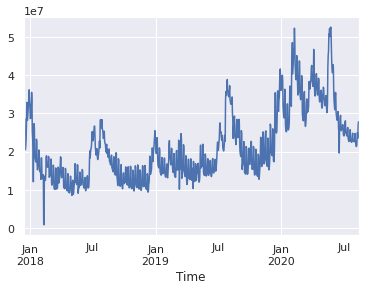

In [ ]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('271590_GTA _V.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.plot()
pyplot.show()

In [ ]:
## Cleaning up the data
df.columns=["Day","Sum_Player"]
df.head()

,Day,Sum_Player
0,12/14/2017,21014611
1,12/15/2017,23589494
2,12/16/2017,28700442
3,12/17/2017,28414362
4,12/18/2017,20558508


In [ ]:
# Convert Month into Datetime
df['Day']=pd.to_datetime(df['Day'])

In [ ]:
df.set_index('Day',inplace=True)

In [ ]:
#train = df.iloc[:77]
#test = df.iloc[77:]

In [ ]:
#train = train. drop(labels='Time', axis=1)
#test = test. drop(labels='Time', axis=1)

In [ ]:
import math

dataset = df.Sum_Player.values

training_data_len = math.ceil( len(dataset) * 0.8)
training_data_len

779

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
scaler.fit_transform(df)
scaled_data = scaler.transform(df)

In [ ]:
train_data = scaled_data[0:training_data_len, :]

x_train = []
y_train = []

for i in range(14, len(train_data)): #10
    x_train.append(train_data[i-14:i, 0]) #10
    y_train.append(train_data[i, 0])
    if i<= 15: #11
        print(x_train)
        print(y_train)
        print()


x_train, y_train = np.array(x_train), np.array(y_train)


x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


[array([0.3902357 , 0.44003358, 0.5388786 , 0.53334586, 0.38141473,
       0.37993054, 0.39832785, 0.43161301, 0.50814058, 0.61932877,
       0.57364728, 0.52814032, 0.55466761, 0.58332553])]
[0.6000390742542535]

[array([0.3902357 , 0.44003358, 0.5388786 , 0.53334586, 0.38141473,
       0.37993054, 0.39832785, 0.43161301, 0.50814058, 0.61932877,
       0.57364728, 0.52814032, 0.55466761, 0.58332553]), array([0.44003358, 0.5388786 , 0.53334586, 0.38141473, 0.37993054,
       0.39832785, 0.43161301, 0.50814058, 0.61932877, 0.57364728,
       0.52814032, 0.55466761, 0.58332553, 0.60003907])]
[0.6000390742542535, 0.6423438007943305]



In [ ]:
###

#**Adam Optimizer**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model_lstm = Sequential()
model_lstm.add(LSTM(189, return_sequences=False, input_shape= (x_train.shape[1], 1))) #input_shape= (x_train.shape[1], 1) , lstm 125
model_lstm.add(Dense(1))

model_lstm.compile(optimizer='adam', loss='mean_squared_error', metrics = ['mse', 'mae', 'mape'])

model_lstm.fit(x_train, y_train, batch_size=1, epochs=100)

Epoch 1/100
765/765 [==============================] - 10s 11ms/step - loss: 0.0060 - mse: 0.0060 - mae: 0.0606 - mape: 236512.3594
Epoch 2/100
765/765 [==============================] - 8s 11ms/step - loss: 0.0038 - mse: 0.0038 - mae: 0.0482 - mape: 216209.0938
Epoch 3/100
765/765 [==============================] - 8s 10ms/step - loss: 0.0026 - mse: 0.0026 - mae: 0.0377 - mape: 167750.2500
Epoch 4/100
765/765 [==============================] - 8s 11ms/step - loss: 0.0022 - mse: 0.0022 - mae: 0.0340 - mape: 100707.9844
Epoch 5/100
765/765 [==============================] - 8s 10ms/step - loss: 0.0019 - mse: 0.0019 - mae: 0.0319 - mape: 101040.7969
Epoch 6/100
765/765 [==============================] - 9s 12ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0320 - mape: 16322.6641
Epoch 7/100
765/765 [==============================] - 8s 11ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0294 - mape: 24576.7637
Epoch 8/100
765/765 [==============================] - 9s 12ms/step - loss: 0.0017 -

In [ ]:
#Create the testing data set
test_data1 = scaled_data[training_data_len - 14: , :] #10
#Create the data sets x_test and y_test
x_test = []
y_test = df.values[779:, :] #779, kalo 772 = 7
for i in range(14, len(test_data1)): #10
  x_test.append(test_data1[i-14:i, 0]) #10

In [ ]:
#convert the data to numpy array
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(194, 14, 1)

In [ ]:
# Get the models predicted price values
predictions = model_lstm.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
train = df[:training_data_len]
valid = df[training_data_len:]
valid['Predictions'] = predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
valid

,Sum_Player,Predictions
Day,,
2020-02-01,45651402,43754884.0
2020-02-02,48491426,46630208.0
2020-02-03,40332167,40503320.0
2020-02-04,42131215,38185988.0
2020-02-05,43539612,39478692.0
...,...,...
2020-08-08,23675922,23842156.0
2020-08-09,24957778,24554000.0
2020-08-10,23465320,22202344.0


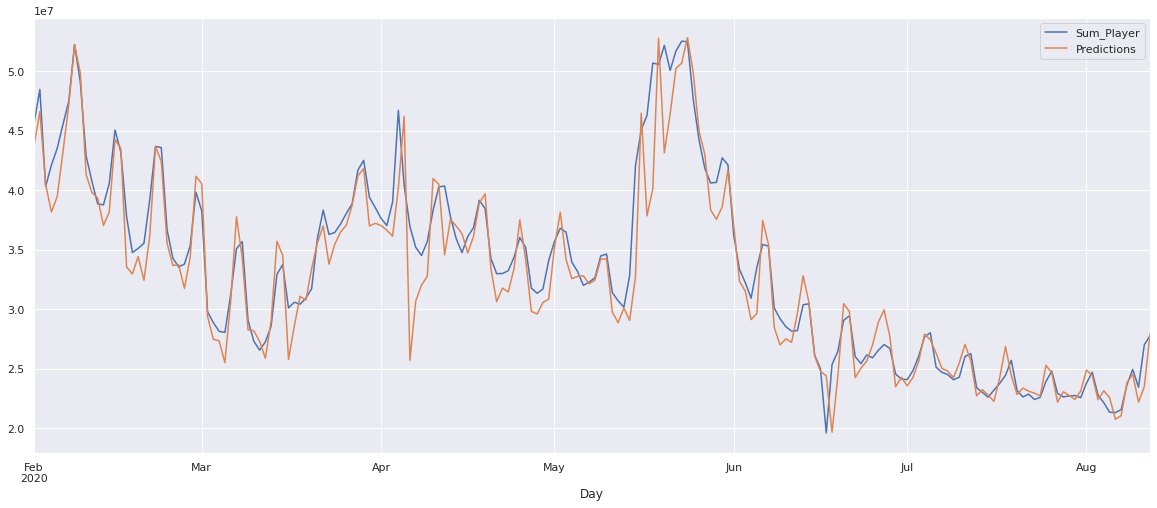

In [ ]:
valid.plot(figsize=(20,8))

In [ ]:
predictions = []
first_eval_batch = train_data[-14: ] #10
crntbatch = first_eval_batch.reshape((1, 14, 1)) #10
for i in range(35):
  crntpred = model_lstm.predict(crntbatch)[0]
  predictions.append(crntpred)
  crntbatch = np.append(crntbatch[: ,1:,:], [[crntpred]],axis=1)

In [ ]:
predictions

[array([0.83002937], dtype=float32),
 array([0.8375337], dtype=float32),
 array([0.7085341], dtype=float32),
 array([0.6853961], dtype=float32),
 array([0.6546664], dtype=float32),
 array([0.6422248], dtype=float32),
 array([0.65424263], dtype=float32),
 array([0.73635566], dtype=float32),
 array([0.7306973], dtype=float32),
 array([0.6465753], dtype=float32),
 array([0.56848675], dtype=float32),
 array([0.5577248], dtype=float32),
 array([0.5386902], dtype=float32),
 array([0.51142037], dtype=float32),
 array([0.61621165], dtype=float32),
 array([0.66262877], dtype=float32),
 array([0.52577543], dtype=float32),
 array([0.46094593], dtype=float32),
 array([0.43935758], dtype=float32),
 array([0.41145706], dtype=float32),
 array([0.4089253], dtype=float32),
 array([0.57231295], dtype=float32),
 array([0.6246736], dtype=float32),
 array([0.4568542], dtype=float32),
 array([0.4278404], dtype=float32),
 array([0.42478558], dtype=float32),
 array([0.41303068], dtype=float32),
 array([0.4417

In [ ]:
true_predictions = scaler.inverse_transform(predictions)

In [ ]:
true_predictions

array([[43754881.77251995],
       [44142906.49314476],
       [37472765.79870689],
       [36276374.22153747],
       [34687445.9367137 ],
       [34044130.27783346],
       [34665533.21282017],
       [38911325.33546245],
       [38618748.86504614],
       [34269079.33609849],
       [30231381.04148585],
       [29674914.96900779],
       [28690700.81468642],
       [27280667.88445104],
       [32699077.35752368],
       [35099152.42532694],
       [28022920.57039595],
       [24670802.37054453],
       [23554540.16958744],
       [22111897.03801346],
       [21980987.77498937],
       [30429221.19407332],
       [33136616.82105613],
       [24459232.09349212],
       [22959025.68477029],
       [22801070.69621489],
       [22193263.82050473],
       [23677471.78341344],
       [30285010.19879544],
       [32756833.25706864],
       [24778601.56885475],
       [23993673.00558865],
       [23979836.55356053],
       [23312476.99658531],
       [25607904.16849482]])

In [ ]:
prediction_LSTM = pd.DataFrame(true_predictions,
             columns=['LSTM Prediction Adam Optimizer'])

prediction_LSTM

,LSTM Prediction Adam Optimizer
0,4.375488e+07
1,4.414291e+07
2,3.747277e+07
3,3.627637e+07
4,3.468745e+07
5,3.404413e+07
6,3.466553e+07
7,3.891133e+07
8,3.861875e+07
9,3.426908e+07


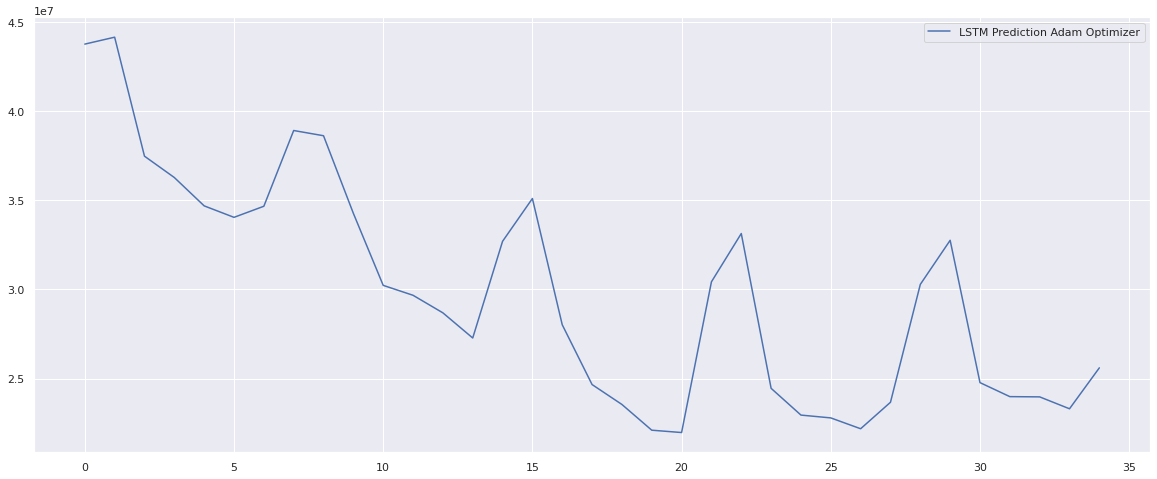

In [ ]:
prediction_LSTM.plot(figsize=(20,8))

In [ ]:
####

In [ ]:
def mape(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

#MAPE_test_Adam = mape(x_test, y_test)

#MAPE_All_Adam = mape(x_train, prediction_LSTM)
MAPE = mape(valid['Sum_Player'], valid['Predictions'])
MAPE

4.601016274337737

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(valid['Sum_Player'],valid['Predictions'])
MSD = mean_squared_error(valid['Sum_Player'],valid['Predictions'])
print(MAE)
print(MSD)

1586170.175257732
5809716052935.722


In [ ]:
from sklearn.metrics import mean_squared_error

#RMSE_test_Adam = mean_squared_error(x_test, y_test)
#RMSE_All_Adam = mean_squared_error(df, prediction_LSTM)

#**MAPE**

In [ ]:
#MAPE_test_Adam

In [ ]:
#MAPE_All_Adam

#**RMSE**

In [ ]:
#RMSE_test_Adam

In [ ]:
#RMSE_All_Adam

#**Print**

In [ ]:
pip install xlsxwriter

     |████████████████████████████████| 149 kB 7.5 MB/s 


In [ ]:
# writing to Excel
datatoexcel = pd.ExcelWriter('Train_Data_Prediction.xlsx')

# write DataFrame to excel
valid.to_excel(datatoexcel)

# save the excel
datatoexcel.save()

In [ ]:
# writing to Excel
datatoexcel = pd.ExcelWriter('True_Prediction.xlsx')

# write DataFrame to excel
prediction_LSTM.to_excel(datatoexcel)

# save the excel
datatoexcel.save()